In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
!pip install --upgrade xlrd #colab bug verson xlrd
!pip install geopandas
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install pygeos
!pip install topojson
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt ;
#!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
#!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

## Annexe à la deuxième étude de cas de la partie I

Idée : prendre en compte la variable niveau_prioritaire pour comparer par rapport à l'analyse sociologique de Luc Boltanski.

In [2]:
#Récuppération de la base effectifs
eff = pd.read_csv("effectifs.csv", sep = ";", encoding = 'utf-8', engine = 'python')

#Récupération de la base avec les effectifs de la population par département
pop = pd.read_csv('base_pop_dep.csv', sep=",", encoding='utf-8', engine='python')

# Suppression la colonne 'Unnamed: 0', qui est souvent ajoutée lors de l'écriture dans un fichier CSV
pop = pop.drop(['Unnamed: 0'], axis=1)

#Dataframes sommant les niveaux de pollution par source
#selon la région :
pollution_group_reg = pd.read_csv('pollution_group_reg.csv', sep=',', encoding='utf-8')
#selon le département :
pollution_group_dep = pd.read_csv('pollution_group_dep.csv', sep=',', encoding='utf-8')

In [3]:
# Fusion des tables effectifs, pop et pollution_group_dep

merged_df = pd.merge(eff, pollution_group_dep, left_on=['dept'], right_on=['DEP'], 
                    how='inner')
pop_eff_pol = pd.merge(merged_df, pop, left_on=['DEP'], right_on=['numero_dep'], 
                    how='inner')

# Supprimer les colonnes redondantes
pop_eff_pol = pop_eff_pol.drop(['numero_dep', 'dept'], axis=1)

In [4]:
pop_eff_pol['niveau_prioritaire'].replace('1,2,3', np.nan, inplace=True)

In [5]:
# Fonction pour ajouter les pourcentages au-dessus des barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height, f'{height:.1%}',
                ha='center', va='bottom')

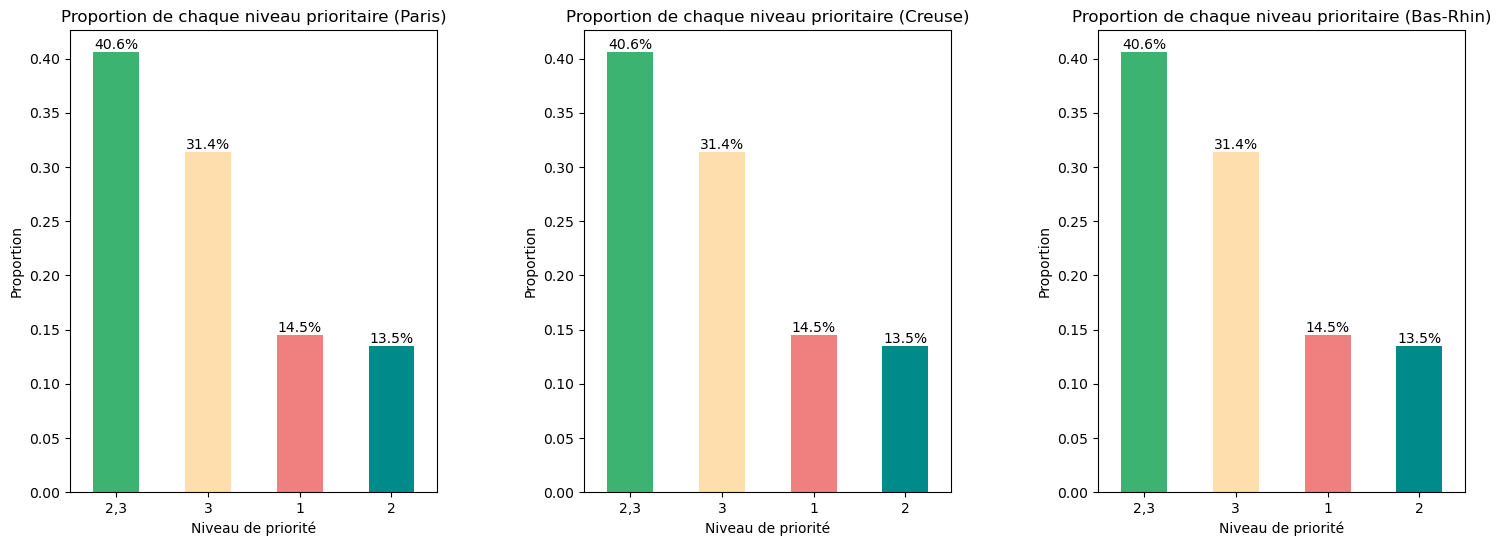

In [7]:
def plot_proportion_graph(ax, data, department):
    # Filtrer les données pour le département spécifié
    department_data = data[data['dep'] == department]

    # Trier le DataFrame en fonction de la variable 'niveau_prioritaire'
    department_data = department_data.sort_values(by='niveau_prioritaire')

    # Calculer la proportion de chaque valeur de niveau_prioritaire
    proportion_niveau_prioritaire = department_data['niveau_prioritaire'].value_counts(normalize=True)

    # Créer un graphique à barres sur le sous-graphique spécifié
    proportion_niveau_prioritaire.plot(kind='bar', color=['mediumseagreen', 'navajowhite', 'lightcoral', 'darkcyan'], ax=ax)
    ax.set_ylabel('Proportion')
    ax.set_xlabel('Niveau de priorité')
    ax.set_title(f'Proportion de chaque niveau prioritaire ({department})')

    # Fonction pour ajouter les pourcentages au-dessus des barres
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2., height, f'{height:.1%}',
                    ha='center', va='bottom')

    # Appeler la fonction autolabel
    autolabel(ax.patches)

    # Changer l'orientation des étiquettes de l'axe x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Créer une grille de 1 ligne par 3 colonnes pour les graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Appeler la fonction pour chaque département avec son propre sous-graphique
plot_proportion_graph(axes[0], pop_eff_pol, 'Paris')
plot_proportion_graph(axes[1], pop_eff_pol, 'Creuse')
plot_proportion_graph(axes[2], pop_eff_pol, 'Bas-Rhin')

# Ajuster l'espacement entre les graphiques
plt.subplots_adjust(wspace=0.4)

# Afficher la grille de graphiques
plt.show()

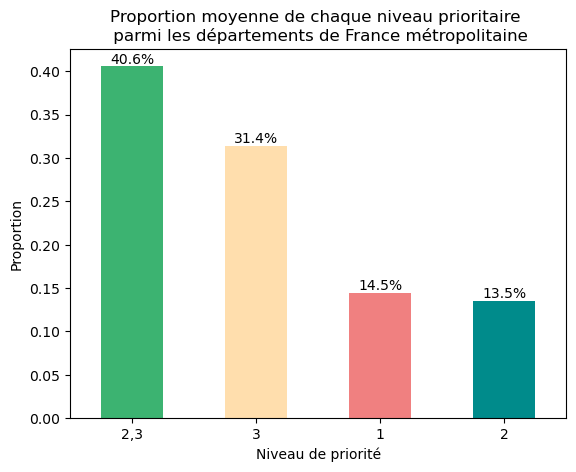

In [8]:
# Trier le DataFrame en fonction de la variable 'niveau_prioritaire'
france_data = pop_eff_pol.sort_values(by='niveau_prioritaire')

# Calculer la proportion de chaque valeur de niveau_prioritaire
proportion_niveau_prioritaire = france_data['niveau_prioritaire'].value_counts(normalize=True)

# Créer un graphique à barres
ax = proportion_niveau_prioritaire.plot(kind='bar', color=['mediumseagreen', 'navajowhite', 'lightcoral', 'darkcyan'])
plt.ylabel('Proportion')
plt.xlabel('Niveau de priorité')
plt.title('Proportion moyenne de chaque niveau prioritaire \n parmi les départements de France métropolitaine')

# Appeler la fonction autolabel avec les barres actuelles
autolabel(ax.patches)

# Changer l'orientation des étiquettes de l'axe x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()